In [1]:
import json
import random as rd
from NLTKProcessor import NLTKProcessor
from unidecode import unidecode
from nltk.tag.perceptron import PerceptronTagger
from nltk.corpus import stopwords
import nltk as nltk
import joblib
import re

In [2]:
file = 'anotados_3929.json'
with open('C:\\Users\\92007848\\Documents\\AIProj\\AiTeste\\NLTKAlpha\\Resources\\'+file,encoding='Utf-8') as json_file:
    conteudo = json.load(json_file)

In [3]:
##Criar um ID para as entradas do dataSet
conteudo_id = []
for line , data in enumerate(conteudo):
    element = {line: data}
    conteudo_id.append(element)

In [4]:
#Separando os conteudos de cada trecho
#Separando o content, annotation e as keywords
contents = {}
annotations = {}
keywords = []
for number , data in enumerate(conteudo_id):
    contents[number] = data[number]['content']
    annotations[number] = data[number]['annotation']   
    for annotation in data[number]['annotation']:
        #print(unidecode(annotation[0]['points'][0]['text'].lower().replace('\'','').replace('\"','')) if annotation[0]['label'][0] != 'CUMPRIMENTO' else 'cumprimento')
        keywords.append(unidecode(annotation[0]['points'][0]['text'].lower().replace('\'','').replace('\"','')) if annotation[0]['label'][0] != 'CUMPRIMENTO' else 'cumprimento')
    


In [5]:
contents

{0: 'Eu vou poder usar o visual G nas provas ?',
 1: 'Porque treinamos no visualg apenas calculos? ',
 2: 'Prezado Professor Vinicius, Boa Noite! Não estou conseguindo entender a resolução destas 02 questões do anexo. Consigo digitar mais não sei onde verificar o resultado e digitar na formula para fazer os testes. Desde de Já Agradeço seu Apoio! Atenciosamente, Osmar Alves Oliveira',
 3: 'Olá estou com muita dificuldade de fazer o trabalho, a questão 1 Eu consegui fazer mas travei na 2 não tenho a mínima ideia de como fazer esse sistema de apostas...',
 4: 'na disciplina de arquitetura de computadores eles disponibilizam um maior número de pdf para consulta, sendo assim mesmo com pouca experiência consigo localizar o conteúdo referido e assim ter alguma chance... não seria possível aumentar a quantidade de materiais em pdf e a semelhança entre eles... de qualquer forma eu lhes agradeço',
 5: 'Olá! Quando sai a nota do trabalho?',
 6: 'Gostaria de saber se lógica de programação tem pro

In [22]:
path = 'C:\\Users\\92007848\\Documents\\AIProj\\AiTeste\\NLTKAlpha\\Resources\\Models\\AlphaTagger3_003.pkl'
pattern = '''NP:  {<K><STOP><K>} 
                  {<K>+}'''
processor = NLTKProcessor(path, stopwords.words('portuguese'), pattern, nltk.word_tokenize)

In [23]:
result = []
for i in range(len(contents)):
    result.append((i,processor.process(contents[i])))
    

In [24]:
for i in result:
    print(i)
    #print(contents[i[0]])

(0, ['visual g'])
(1, ['visualg'])
(2, ['formula'])
(3, [])
(4, ['arquitetura de computadores ', 'numero'])
(5, [])
(6, ['se', 'logica de programacao '])
(7, [])
(8, ['ou'])
(9, ['se', 'linguagem c ou ', 'portugol'])
(10, [])
(11, ['funcao', 'strings', 'valor inteiro', 'posicao', 'funcao', 'string na posicao '])
(12, ['media', 'ou', 'ate'])
(13, ['se', 'chamhum'])
(14, ['print', 'erro do programa ', 'visual studio'])
(15, ['vetor ou matriz para ', 'for', 'if', 'else ou', 'switch case', 'while'])
(16, ['visual studio', 'arquivo'])
(17, [])
(18, ['visual studio', 'erro', 'codigo', 'programa'])
(19, ['logica de programacao ', 'algoritmos'])
(20, ['erro', 'linha', 'coluna', 'valor', 'linha', 'linha'])
(21, ['se', 'programacao'])
(22, ['visual g'])
(23, ['programacao', 'algoritmo'])
(24, ['se', 'visual studio'])
(25, ['se'])
(26, [])
(27, ['biblioteca virtual', 'visualg'])
(28, ['se', 'programa'])
(29, ['para', 'logica de programacao ', 'algoritmos', 'se', 'ou'])
(30, [])
(31, ['programa vi

(1721, ['numero', 'se'])
(1722, ['dado'])
(1723, ['software visualg', 'ou'])
(1724, ['logica de programacao ', 'algoritmos', 'se', 'ou'])
(1725, ['ate'])
(1726, ['variaveis', 'se', 'tipo inteiro ou real '])
(1727, ['algoritmos'])
(1728, ['exercicio', 'visualg', 'exercicio'])
(1729, ['se'])
(1730, ['codigos', 'exercicios', 'se', 'estrutura', 'se', 'se', 'logica', 'compilar', 'codigo', 'se', 'visualg', 'se', 'pseudocodigo ou', 'visualg'])
(1731, ['arquitetura de computadores ', 'logica de programacao ', 'algoritmos'])
(1732, ['para'])
(1733, ['codigo', 'kkk', '#', '#', 'int main', 'int', 'i', 'printf', 'numero de posicoes ', 'ou', 'scanf_s', 'if', 'printf', 'numero', 'while', 'if', 'for', 'if', 'i', 'i', 'i', 'else', 'i', 'i', 'printf', '\\n', 'for', 'printf', 'i', 'printf', '\\n', 'for', 'printf', 'i', 'system', 'pause', 'return'])
(1734, ['codigo c++', 'programa', 'ou', 'calcular a porcentagem '])
(1735, ['se'])
(1736, ['algoritmos', 'linguagem de programacao ', 'c'])
(1737, ['exercici

(3159, ['algoritmos', 'codigo', 'visualg', 'menor', 'numeros', 'menor', 'numeros', 'menor', 'menor', 'numero', 'codigos', 'arquivo', 'codigos', 'erro'])
(3160, ['codigo', 'dados', 'programa', 'comandos', 'logica', 'algoritmo', 'ler', 'valores', 'menor valor', 'var', 'inteiro menor', 'inteiro', 'secao de comandos ', 'procedimento', 'funcoes', 'operadores', 'escreval', 'numeros', 'leia', 'leia', 'leia', 'se', 'entao escreva', 'menor numero', 'senao se', 'entao escreva', 'menor numero', 'senao se', 'entao escreva', 'menor numero', 'fimse fimse fimse fimalgoritmo '])
(3161, [])
(3162, ['codigo', 'exercicio', 'visual studio', 'loop', 'programa', 'numero', 'se', 'bug', 'loop menor', 'programa', 'codigo'])
(3163, [])
(3164, [])
(3165, ['se', 'programa', 'visual studio', 'programacao', 'se', 'notepad++ ou', 'dec++'])
(3166, ['somar', 'algoritmo', 'n numeros', 'calcular', 'vetor e somar ', 'numeros dos vetores '])
(3167, ['exercicio', 'valor', 'n do vetor ', 'ou', 'numero menor', 'leitura', 'te

In [25]:
print(processor.raw_process(contents[770]))

[('os', 'STOP'), ('exercicios', 'N'), ('que', 'KS'), ('a', 'STOP'), ('professora', 'N'), ('maristela', 'N'), ('faz', 'V'), ('no', 'STOP'), ('visualg', 'K'), ('tem', 'V'), ('a', 'STOP'), ('resolucao', 'N'), ('de', 'STOP'), ('baixa', 'N'), ('qualidade', 'N'), (',', ','), ('dificultando', 'V'), ('o', 'STOP'), ('visualizacao', 'N'), ('das', 'STOP'), ('letras', 'N'), ('.', '.'), ('na', 'N'), ('linha', 'K'), ('resto', 'N'), (',', ','), ('a', 'STOP'), ('resolucao', 'N'), ('esta', 'PROADJ'), ('muito', 'ADV'), ('ruim', 'ADJ'), (',', ','), ('mas', 'KC'), ('agora', 'ADV'), ('entendi', 'V'), ('e', 'STOP'), ('(', '('), ('<', 'NPROP'), ('-', 'K'), (')', ')')]


In [68]:
listao = [j for x in result for j in x[1]]

In [74]:
listao

['visual g',
 'visualg',
 'formula',
 'arquitetura de computadores ',
 'numero',
 'se',
 'logica de programacao ',
 'ou',
 'se',
 'linguagem c ou ',
 'portugol',
 'funcao',
 'strings',
 'valor inteiro',
 'posicao',
 'funcao',
 'string na posicao ',
 'media',
 'ou',
 'ate',
 'se',
 'chamhum',
 'print',
 'erro do programa ',
 'visual studio',
 'vetor ou matriz para ',
 'for',
 'if',
 'else ou',
 'switch case',
 'while',
 'visual studio',
 'arquivo',
 'visual studio',
 'erro',
 'codigo',
 'programa',
 'logica de programacao ',
 'algoritmos',
 'erro',
 'linha',
 'coluna',
 'valor',
 'linha',
 'linha',
 'se',
 'programacao',
 'visual g',
 'programacao',
 'algoritmo',
 'se',
 'visual studio',
 'se',
 'biblioteca virtual',
 'visualg',
 'se',
 'programa',
 'para',
 'logica de programacao ',
 'algoritmos',
 'se',
 'ou',
 'programa visual studio ',
 'execucao',
 'se',
 'se',
 'logica de programacao ',
 'algoritmos',
 'decimais',
 'programa',
 'comando printf',
 'visual studio',
 'erro',
 'arquiv

In [115]:
import collections as cl
plotdict = {}
listaodict = cl.Counter(listao)
for i in listaodict.items():
    plotdict[i[0]] = i[1]

In [116]:
plot = sorted(plotdict.items(), reverse=True, key=lambda x: x[1])
plot

[('se', 1438),
 ('printf', 1272),
 ('i', 766),
 ('algoritmo', 739),
 ('ou', 723),
 ('codigo', 625),
 ('escreval', 613),
 ('erro', 561),
 ('numero', 546),
 ('-', 529),
 ('leia', 464),
 ('for', 446),
 ('int', 423),
 ('valor', 420),
 ('c', 409),
 ('vetor', 394),
 ('programa', 392),
 ('exercicio', 386),
 ('logica de programacao ', 384),
 ('j', 381),
 ('#', 366),
 ('scanf_s', 357),
 ('matriz', 353),
 ('numeros', 338),
 ('visualg', 336),
 ('algoritmos', 334),
 ('visual studio', 331),
 ('para', 287),
 ('entao', 283),
 ('media', 270),
 ('funcao', 258),
 ('linha', 249),
 ('if', 247),
 ('escreva', 234),
 ('inteiro', 197),
 ('int main', 195),
 ('+', 195),
 ('char', 195),
 ('return', 189),
 ('n', 184),
 ('system', 183),
 ('faca', 181),
 ('variaveis', 178),
 ('tela', 178),
 ('pause', 173),
 ('variavel', 170),
 ('linhas', 161),
 ('posicao', 159),
 ('x', 159),
 ('\\n', 152),
 ('coluna', 145),
 ('menor', 142),
 ('real', 135),
 ('while', 134),
 ('scanf', 131),
 ('break', 129),
 ('soma', 128),
 ('dados'

In [118]:
plot

[('se', 1438),
 ('printf', 1272),
 ('i', 766),
 ('algoritmo', 739),
 ('ou', 723),
 ('codigo', 625),
 ('escreval', 613),
 ('erro', 561),
 ('numero', 546),
 ('-', 529),
 ('leia', 464),
 ('for', 446),
 ('int', 423),
 ('valor', 420),
 ('c', 409),
 ('vetor', 394),
 ('programa', 392),
 ('exercicio', 386),
 ('logica de programacao ', 384),
 ('j', 381),
 ('#', 366),
 ('scanf_s', 357),
 ('matriz', 353),
 ('numeros', 338),
 ('visualg', 336),
 ('algoritmos', 334),
 ('visual studio', 331),
 ('para', 287),
 ('entao', 283),
 ('media', 270),
 ('funcao', 258),
 ('linha', 249),
 ('if', 247),
 ('escreva', 234),
 ('inteiro', 197),
 ('int main', 195),
 ('+', 195),
 ('char', 195),
 ('return', 189),
 ('n', 184),
 ('system', 183),
 ('faca', 181),
 ('variaveis', 178),
 ('tela', 178),
 ('pause', 173),
 ('variavel', 170),
 ('linhas', 161),
 ('posicao', 159),
 ('x', 159),
 ('\\n', 152),
 ('coluna', 145),
 ('menor', 142),
 ('real', 135),
 ('while', 134),
 ('scanf', 131),
 ('break', 129),
 ('soma', 128),
 ('dados'

In [129]:
plot.remove(('se',1438))
plot.remove(('-',529))

In [130]:
import matplotlib.pyplot as plt
tam = 10
values = [x[1] for x in plot[:tam]]
labels = [x[0] for x in plot[:tam]]


In [131]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

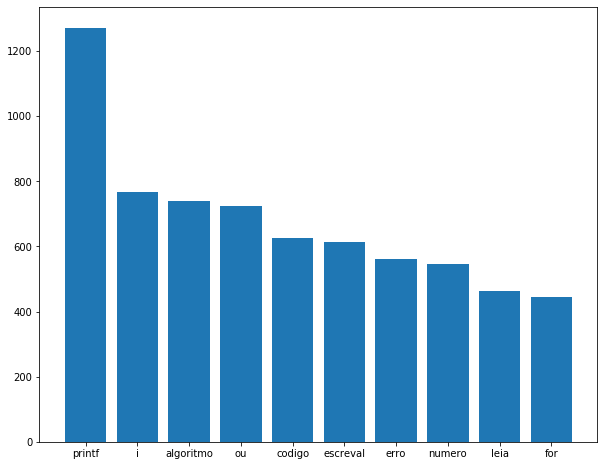

In [132]:
plt.bar(range(tam), values, align='center')
plt.xticks(range(tam),labels)
plt.show()

In [133]:
valores = ['visual studio', 'matriz', 'vetor']
filtro = [x for x in plot if x[0] in valores]

In [135]:
values = [x[1] for x in filtro]
labels = [x[0] for x in filtro]


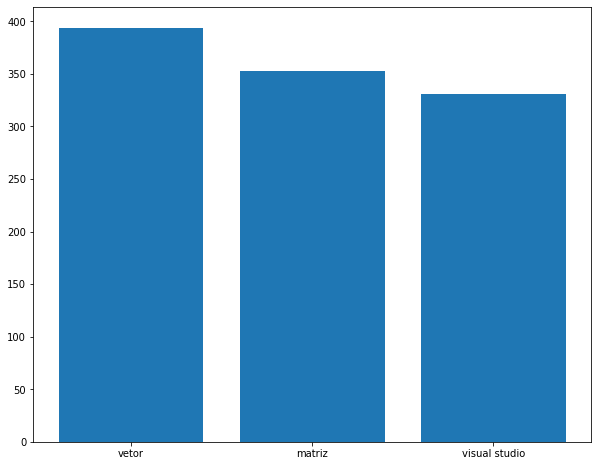

In [139]:
plt.bar(range(len(values)), values, align='center')
plt.xticks(range(len(labels)),labels)
plt.show()

In [140]:
from nltk.util import ngrams

In [149]:
cnts = [y for x in range(len(contents)) for y in nltk.word_tokenize(unidecode(contents[x].lower()))]

In [150]:
cnts

['eu',
 'vou',
 'poder',
 'usar',
 'o',
 'visual',
 'g',
 'nas',
 'provas',
 '?',
 'porque',
 'treinamos',
 'no',
 'visualg',
 'apenas',
 'calculos',
 '?',
 'prezado',
 'professor',
 'vinicius',
 ',',
 'boa',
 'noite',
 '!',
 'nao',
 'estou',
 'conseguindo',
 'entender',
 'a',
 'resolucao',
 'destas',
 '02',
 'questoes',
 'do',
 'anexo',
 '.',
 'consigo',
 'digitar',
 'mais',
 'nao',
 'sei',
 'onde',
 'verificar',
 'o',
 'resultado',
 'e',
 'digitar',
 'na',
 'formula',
 'para',
 'fazer',
 'os',
 'testes',
 '.',
 'desde',
 'de',
 'ja',
 'agradeco',
 'seu',
 'apoio',
 '!',
 'atenciosamente',
 ',',
 'osmar',
 'alves',
 'oliveira',
 'ola',
 'estou',
 'com',
 'muita',
 'dificuldade',
 'de',
 'fazer',
 'o',
 'trabalho',
 ',',
 'a',
 'questao',
 '1',
 'eu',
 'consegui',
 'fazer',
 'mas',
 'travei',
 'na',
 '2',
 'nao',
 'tenho',
 'a',
 'minima',
 'ideia',
 'de',
 'como',
 'fazer',
 'esse',
 'sistema',
 'de',
 'apostas',
 '...',
 'na',
 'disciplina',
 'de',
 'arquitetura',
 'de',
 'computador

In [153]:
bilist = list(ngrams(cnts,2))

In [157]:
for x in bilist:
    if x[0] == 'algoritimo':
        print(x)

('algoritimo', 'veio')
('algoritimo', '?')
('algoritimo', 'de')
('algoritimo', 'sem')
('algoritimo', 'mandando')
('algoritimo', '?')
('algoritimo', '.')
('algoritimo', ',')
('algoritimo', 'nao')
('algoritimo', 'esta')
('algoritimo', 'nao')
('algoritimo', 'em')
('algoritimo', '.')
('algoritimo', 'com')
('algoritimo', 'errada')
('algoritimo', 'para')
('algoritimo', 'mas')
('algoritimo', 'nao')
('algoritimo', 'esta')
('algoritimo', 'que')
('algoritimo', ',')
('algoritimo', ':')
('algoritimo', 'de')
('algoritimo', '.')
('algoritimo', 'como')
('algoritimo', 'var')
('algoritimo', 'tem')
('algoritimo', ',')
('algoritimo', 'utiliza')
('algoritimo', 'inverte')
('algoritimo', ':')
('algoritimo', 'maior')
('algoritimo', 'e')
('algoritimo', ',')
('algoritimo', 'tem')
('algoritimo', 'e')
('algoritimo', 'me')
('algoritimo', 'para')
('algoritimo', 'vai')
('algoritimo', 'e')
('algoritimo', 'ou')
('algoritimo', 'que')
('algoritimo', 'funcionou')
('algoritimo', 'que')
('algoritimo', 'e')
('algoritimo', 

In [158]:
bicommon = cl.Counter(bilist)

In [159]:
bicommon

Counter({('eu', 'vou'): 15,
         ('vou', 'poder'): 5,
         ('poder', 'usar'): 1,
         ('usar', 'o'): 78,
         ('o', 'visual'): 219,
         ('visual', 'g'): 43,
         ('g', 'nas'): 1,
         ('nas', 'provas'): 19,
         ('provas', '?'): 6,
         ('?', 'porque'): 20,
         ('porque', 'treinamos'): 1,
         ('treinamos', 'no'): 1,
         ('no', 'visualg'): 163,
         ('visualg', 'apenas'): 1,
         ('apenas', 'calculos'): 1,
         ('calculos', '?'): 1,
         ('?', 'prezado'): 23,
         ('prezado', 'professor'): 30,
         ('professor', 'vinicius'): 64,
         ('vinicius', ','): 75,
         (',', 'boa'): 157,
         ('boa', 'noite'): 1009,
         ('noite', '!'): 181,
         ('!', 'nao'): 41,
         ('nao', 'estou'): 255,
         ('estou', 'conseguindo'): 188,
         ('conseguindo', 'entender'): 9,
         ('entender', 'a'): 16,
         ('a', 'resolucao'): 33,
         ('resolucao', 'destas'): 1,
         ('destas', '02')

In [160]:
biplot = {}
for i in bicommon.items():
    biplot[i[0]] = i[1]

In [161]:
biplot

{('eu', 'vou'): 15,
 ('vou', 'poder'): 5,
 ('poder', 'usar'): 1,
 ('usar', 'o'): 78,
 ('o', 'visual'): 219,
 ('visual', 'g'): 43,
 ('g', 'nas'): 1,
 ('nas', 'provas'): 19,
 ('provas', '?'): 6,
 ('?', 'porque'): 20,
 ('porque', 'treinamos'): 1,
 ('treinamos', 'no'): 1,
 ('no', 'visualg'): 163,
 ('visualg', 'apenas'): 1,
 ('apenas', 'calculos'): 1,
 ('calculos', '?'): 1,
 ('?', 'prezado'): 23,
 ('prezado', 'professor'): 30,
 ('professor', 'vinicius'): 64,
 ('vinicius', ','): 75,
 (',', 'boa'): 157,
 ('boa', 'noite'): 1009,
 ('noite', '!'): 181,
 ('!', 'nao'): 41,
 ('nao', 'estou'): 255,
 ('estou', 'conseguindo'): 188,
 ('conseguindo', 'entender'): 9,
 ('entender', 'a'): 16,
 ('a', 'resolucao'): 33,
 ('resolucao', 'destas'): 1,
 ('destas', '02'): 1,
 ('02', 'questoes'): 1,
 ('questoes', 'do'): 8,
 ('do', 'anexo'): 5,
 ('anexo', '.'): 87,
 ('.', 'consigo'): 3,
 ('consigo', 'digitar'): 1,
 ('digitar', 'mais'): 2,
 ('mais', 'nao'): 21,
 ('nao', 'sei'): 126,
 ('sei', 'onde'): 6,
 ('onde', 've

In [163]:
plot = sorted(biplot.items(), reverse=True, key=lambda x: x[1])
plot

[(('(', '``'), 3100),
 ((')', ';'), 2211),
 (("''", ')'), 1728),
 (('printf', '('), 1283),
 (("''", ','), 1210),
 (('boa', 'noite'), 1009),
 (('escreval', '('), 849),
 ((')', '{'), 830),
 (('boa', 'tarde'), 713),
 ((';', '}'), 710),
 (('atividade', 'pratica'), 675),
 (('[', 'i'), 669),
 ((';', 'printf'), 667),
 (('gostaria', 'de'), 652),
 (('bom', 'dia'), 625),
 (('0', ';'), 623),
 (('i', ']'), 623),
 (('=', '0'), 601),
 ((',', 'e'), 595),
 (('.', 'boa'), 581),
 ((',', 'mas'), 556),
 (('``', '%'), 533),
 (('%', 'd'), 527),
 (('--', '--'), 526),
 (('``', 'digite'), 524),
 (('professor', ','), 488),
 (('de', 'programacao'), 480),
 (('o', 'que'), 478),
 ((']', ')'), 468),
 ((',', 'nao'), 454),
 ((',', 'pois'), 442),
 (('leia', '('), 438),
 (('visual', 'studio'), 432),
 (('#', 'include'), 428),
 (('include', '<'), 424),
 ((')', 'leia'), 417),
 (('logica', 'de'), 414),
 ((',', 'o'), 413),
 (('\\n', "''"), 393),
 ((',', '&'), 392),
 (('escreva', '('), 388),
 (('for', '('), 386),
 (('de', 'sa

In [177]:
limite = 10
valores = ['studio', 'matriz', 'vetor']
filtro = [x for x in plot if x[0][0] in valores]

In [176]:
filtro

[]

In [178]:
values = [x[1] for x in filtro[:limite]]
labels = [x[0] for x in filtro[:limite]]

In [180]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 16
plt.rcParams["figure.figsize"] = fig_size

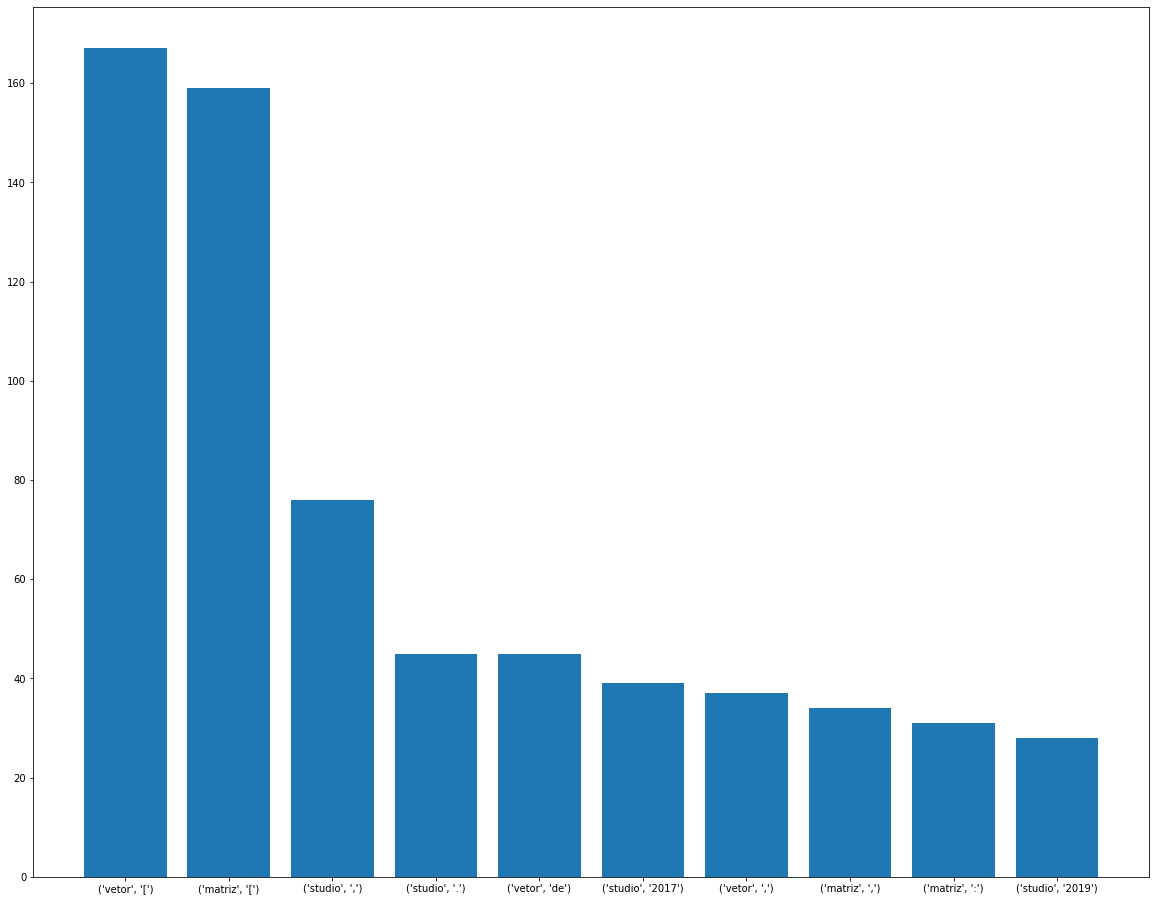

In [181]:
plt.bar(range(len(values)), values, align='center')
plt.xticks(range(len(labels)),labels)
plt.show()

In [198]:
grams = 5
nlist = list(ngrams(cnts,grams))

In [199]:
ncommon = cl.Counter(nlist)

In [200]:
nplot = {}
for i in ncommon.items():
    nplot[i[0]] = i[1]

In [201]:
plot = sorted(nplot.items(), reverse=True, key=lambda x: x[1])
plot

[((')', ';', 'printf', '(', '``'), 524),
 (('--', '--', '--', '--', '--'), 412),
 (('(', '``', '%', 'd', "''"), 304),
 (('``', '%', 'd', "''", ','), 303),
 ((')', ';', 'scanf_s', '(', '``'), 277),
 (('%', 'd', "''", ',', '&'), 275),
 ((';', 'scanf_s', '(', '``', '%'), 274),
 (('scanf_s', '(', '``', '%', 'd'), 228),
 ((';', 'printf', '(', '``', 'digite'), 200),
 (('logica', 'de', 'programacao', 'e', 'algoritmos'), 193),
 ((':', '\\n', "''", ')', ';'), 185),
 (("''", ')', ';', 'printf', '('), 181),
 (('#', 'include', '<', 'stdio.h', '>'), 179),
 ((')', '{', 'printf', '(', '``'), 176),
 (('(', '``', 'pause', "''", ')'), 173),
 (("''", ')', ';', 'scanf_s', '('), 172),
 (('int', 'main', '(', ')', '{'), 170),
 (('system', '(', '``', 'pause', "''"), 170),
 (('``', 'pause', "''", ')', ';'), 164),
 (('#', 'include', '<', 'stdlib.h', '>'), 161),
 (("''", ')', 'escreval', '(', '``'), 159),
 (('para', 'i', 'de', '1', 'ate'), 159),
 (('include', '<', 'stdio.h', '>', '#'), 158),
 (('<', 'stdio.h', '

In [202]:
limite = 10
valores = ['studio', 'matriz', 'vetor']
filtro = [x for x in plot if x[0][0] in valores]

In [204]:
filtro

[(('matriz', '[', 'i', ']', '['), 34),
 (('vetor', '[', '1..100', ']', 'de'), 33),
 (('vetor', '[', '1..10', ']', 'de'), 32),
 (('matriz', '[', 'i', ',', 'j'), 26),
 (('matriz', '[', '0', ']', '['), 20),
 (('matriz', '[', 'linha', ']', '['), 16),
 (('vetor', '[', '1..50', ']', 'de'), 16),
 (('vetor', '[', '1..5', ']', 'de'), 14),
 (('vetor', 'de', 'n', 'posicoes', '.'), 12),
 (('vetor', ':', "''", ')', 'leia'), 10),
 (('vetor', '[', '1..10,1..10', ']', 'de'), 10),
 (('vetor', 'resultante', 'da', 'soma', 'das'), 8),
 (('matriz', 'quadrada', 'dimensao', 'mxm', ','), 8),
 (('matriz', ':', 'vetor', '[', '1..10,1..10'), 8),
 (('matriz', '[', 'tm', ']', '['), 8),
 (('matriz', '[', 'l', ']', '['), 8),
 (('matriz', '[', '2', ']', '['), 7),
 (('matriz', ':', "''", ')', 'leia'), 7),
 (('vetor', 'dos', 'pares', 'e', 'o'), 7),
 (('vetor', 'dos', 'impares', ',', 'este'), 7),
 (('matriz', 'quadrada', 'inteira', 'e', 'um'), 6),
 (('matriz', '[', 'a', ']', '['), 6),
 (('matriz', 'for', '(', 'int', 'i'

In [205]:
values = [x[1] for x in filtro[:limite]]
labels = [x[0] for x in filtro[:limite]]

In [211]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

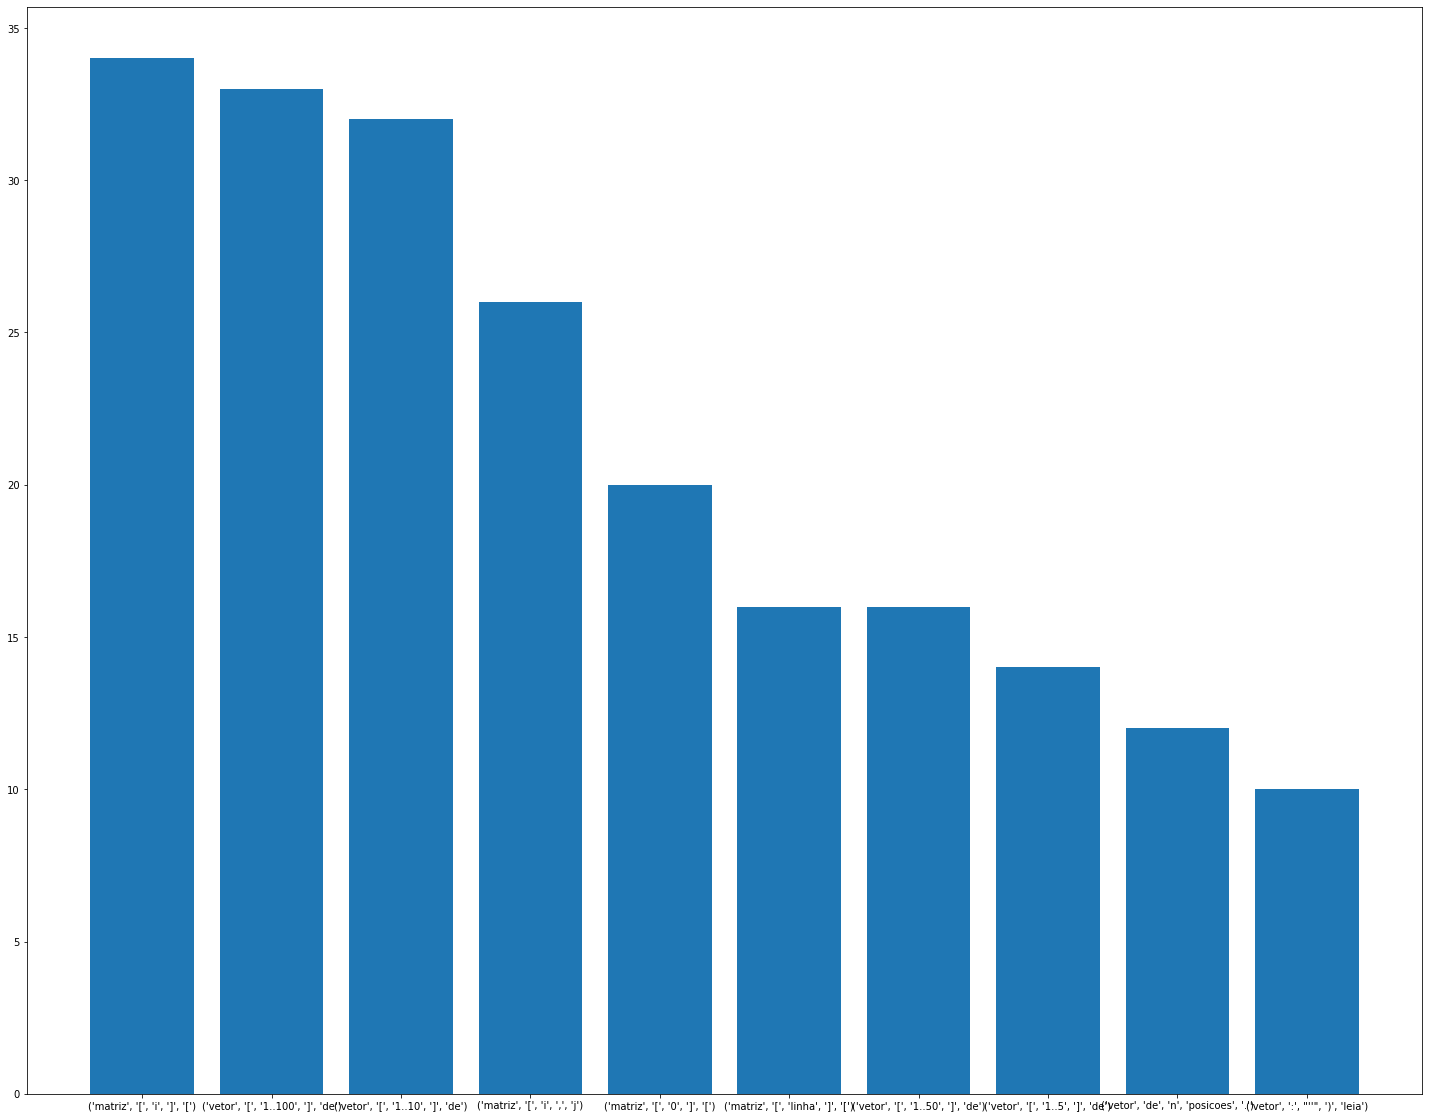

In [212]:
plt.bar(range(len(values)), values, align='center')
plt.xticks(range(len(labels)),labels)
plt.show()